# Convex hull as an index to support an algorithm for the mutualisation of itineraires - to see it renderd visit https://nbviewer.org/github/Universite-Gustave-Eiffel/geodev-logicout/blob/Thiago/notebooks/convex_hull.ipynb

In [7]:
import sys  
sys.path.insert(0, '../scripts')
import use_data, IsInclude
from shapely import wkt
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# we initialize the parameters for the geodataframe
filename = "simulations_reel_gdf.csv"
gdf = use_data.create_gdf(filename,'itineraire')
dist = 100000

Nombre maximum d'étapes dans une tournée :
41

Nombre moyen d'étapes dans une tournée :
6

Nombre de traces directes, i.e. nombre de tournées n'ayant qu'une étape, pour 1096 tournées au total :
298


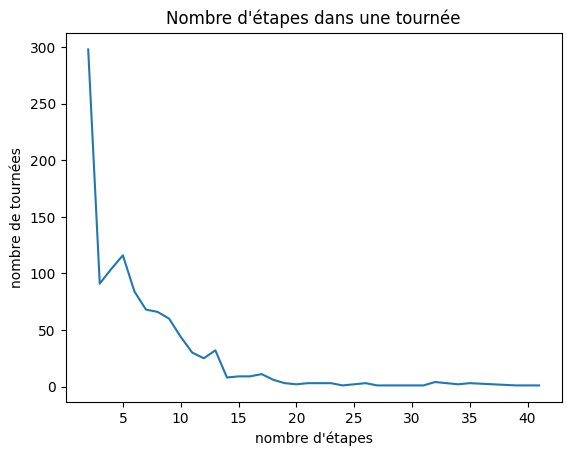

In [9]:
n = gdf.shape[0]
max = 0 # nombre maximum d'étapes dans une tournée
mean = 0 # nombre moyen d'étapes dans une tournée
A = []
for i in range(n):
    tournee = gdf.iloc[[i]]
    linestring = tournee['geometry']
    points = linestring.apply(use_data.line_to_points).explode()
    m = len(points)
    A.append(m)
    mean += m
    if m > max:
        max = m
mean = mean / n
print("Nombre maximum d'étapes dans une tournée :")
print(max)

print("\nNombre moyen d'étapes dans une tournée :")
print(int(mean))

print("\nNombre de traces directes, i.e. nombre de tournées n'ayant qu'une étape, pour "+str(n)+" tournées au total :")
print(A.count(2))

X = np.unique(A)
Y = []
for k in X:
    y = A.count(k)
    Y.append(y)
# Affichage d'une courbe du nombre de tournées en fonction du noombre d'étapes
plt.plot(X, Y)
plt.title("Nombre d'étapes dans une tournée")
plt.xlabel("nombre d'étapes")
plt.ylabel("nombre de tournées")
plt.show()
